In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
plt.style.use("ggplot")


In [4]:
df_steam = pd.DataFrame(pd.read_csv("Data/steam-200k.csv", names=['user-id','game-title','behavior','hours-played',"0"]))

In [5]:
del df_steam["0"]

In [6]:
df_steam.head(10)

,user-id,game-title,behavior,hours-played
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
5,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,purchase,1.0
7,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,purchase,1.0
9,151603712,Left 4 Dead 2,play,8.9


In [7]:
df_steam.isnull().values.any()
df_steam.info()
df_steam.describe()


False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user-id       200000 non-null  int64  
 1   game-title    200000 non-null  object 
 2   behavior      200000 non-null  object 
 3   hours-played  200000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


,user-id,hours-played
count,2.000000e+05,200000.000000
mean,1.036559e+08,17.874384
std,7.208074e+07,138.056952
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


In [8]:
df_steam.groupby(['game-title']).mean().sort_values(by="hours-played",ascending=False).head()

,user-id,hours-played
game-title,,
Eastside Hockey Manager,2.138543e+08,648.000000
FIFA Manager 09,4.630176e+07,206.000000
Perpetuum,6.723111e+07,200.987500
Football Manager 2012,7.458787e+07,194.501887
Football Manager 2014,1.032652e+08,194.017722


In [9]:
df_steam["behavior"].unique(), len(df_steam["game-title"].unique())

(array(['purchase', 'play'], dtype=object), 5155)

In [10]:
df_steam["game-title"].unique()[:15]
np.where(df_steam["game-title"].value_counts() > 1000)

array(['The Elder Scrolls V Skyrim', 'Fallout 4', 'Spore',
       'Fallout New Vegas', 'Left 4 Dead 2', 'HuniePop', 'Path of Exile',
       'Poly Bridge', 'Left 4 Dead', 'Team Fortress 2', 'Tomb Raider',
       'The Banner Saga', 'Dead Island Epidemic', 'BioShock Infinite',
       'Dragon Age Origins - Ultimate Edition'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64),)

In [11]:
df_steam["game-title"].value_counts()[:15]

Dota 2                             9682
Team Fortress 2                    4646
Counter-Strike Global Offensive    2789
Unturned                           2632
Left 4 Dead 2                      1752
Counter-Strike Source              1693
Counter-Strike                     1424
Garry's Mod                        1397
The Elder Scrolls V Skyrim         1394
Warframe                           1271
Half-Life 2 Lost Coast             1158
Sid Meier's Civilization V         1150
Robocraft                          1096
Half-Life 2 Deathmatch             1021
Portal                             1005
Name: game-title, dtype: int64

## Analysis

Text(0.5, 1.0, 'Barplot of occurences more than 1000')

<BarContainer object of 15 artists>

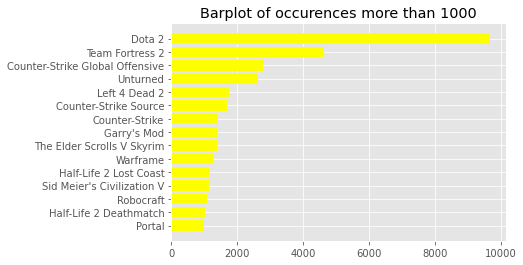

In [11]:
plt.title("Barplot of occurences more than 1000")
plt.barh(np.array(df_steam["game-title"].value_counts()[:15][::-1].axes).ravel(),
        width=df_steam["game-title"].value_counts()[:15][::-1], color="yellow")

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of hours')

(array([1.97075e+05, 1.35100e+03, 5.79000e+02, 3.16000e+02, 2.08000e+02,
        1.23000e+02, 8.50000e+01, 5.90000e+01, 4.40000e+01, 2.90000e+01,
        2.50000e+01, 2.10000e+01, 1.60000e+01, 7.00000e+00, 9.00000e+00,
        1.10000e+01, 4.00000e+00, 6.00000e+00, 4.00000e+00, 5.00000e+00,
        6.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00,
        4.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000000e-01, 2.3517800e+02, 4.7025600e+02, 7.0533400e+02,
        9.4041200e+02, 1.1754900e+03, 1.4105680e+03, 1.6456460e+03,
        1.8807240e+03, 2.1158020e+03, 2.3508800e+03, 2.5859580e+03,
        2.8210360e+03, 3.0561140e+03, 3.2911920e+03, 3.5262700e+

<AxesSubplot:>

Text(0.5, 1.0, 'Distribution of users')

(array([2959.,  974.,  921., 2250., 5602., 2422., 1829., 1880., 2253.,
        1975., 2611., 2344., 3114., 4426., 1834., 3659., 1857., 1985.,
        3464., 3444., 4696., 2079., 3029., 2548., 4520., 2969., 5002.,
        3193., 1850., 2310., 2303., 2692., 1931., 4056., 2014., 3484.,
        2749., 1336., 2836., 1884., 1768., 2019., 2379., 1898., 2255.,
        1602., 2002., 1527., 2444., 1692., 1797., 1762., 2345., 1449.,
        1776., 1743., 1171., 1406., 1104., 1185.,  813., 1397., 1405.,
        2265., 2479., 1473., 1980., 1600., 1769., 1350., 1449., 1171.,
        1134.,  876., 1153., 1416., 1108., 1169., 1467., 1280., 1081.,
        1269., 1422.,  965., 1111., 1118.,  879.,  958.,  754.,  930.,
         621.,  604.,  475.,  377.,  380.,  543.,  542.,  565.,  570.,
         575.,  931.,  713.,  793.,  521.,  543.,  472.,  456.,  361.,
         258.,  291.,  309.,  191.,  244.,  260.,  391.,  221.,  379.,
         295.,  430.,  196.,  261.,  411.,  438.,  395.,  374.,  391.,
      

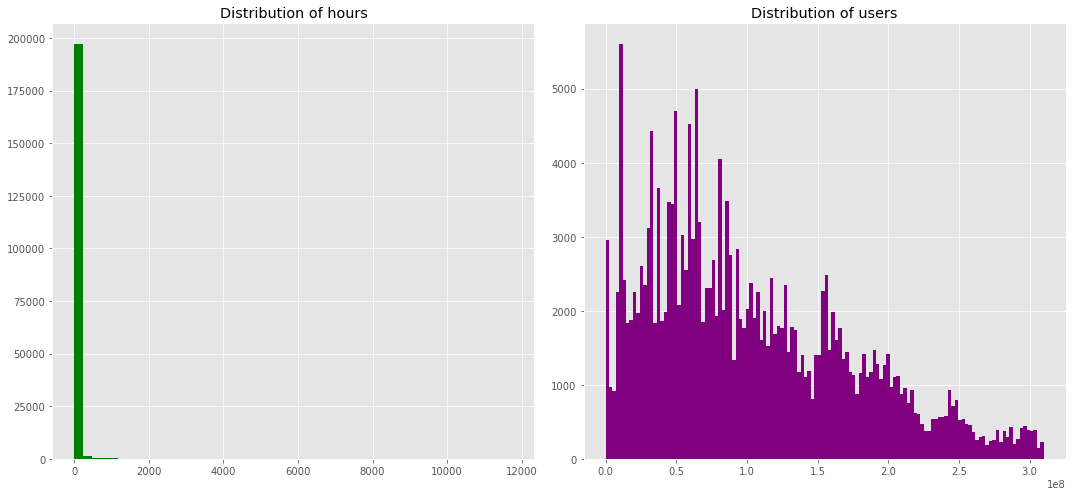

In [12]:
plt.figure(figsize=(15, 7))

plt.subplot(121)
plt.title("Distribution of hours")
plt.hist(x=df_steam["hours-played"], color="green", bins=50)

plt.subplot(122)
plt.title("Distribution of users")
plt.hist(x=df_steam["user-id"], color="purple", bins=128)

plt.tight_layout()

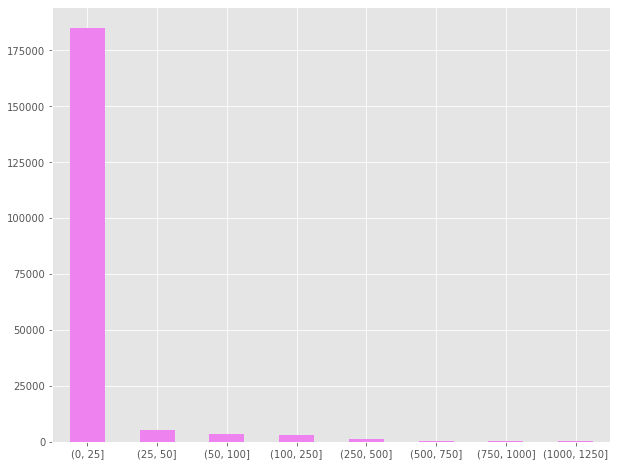

In [13]:
out = pd.cut(df_steam['hours-played'], bins = [0, 25, 50, 100, 250, 500, 750, 1000, 1250])
ax = out.value_counts(sort=False).plot.bar(rot=0, color="violet", figsize = (10, 8))

## Preprocess data

In [12]:
users = []
user_id, game, beh = df_steam["user-id"], df_steam["game-title"], df_steam["behavior"]
for i in range(len(df_steam["user-id"]) - 1):
        if (user_id[i] == user_id[i+1]) and (game[i] == game[i+1]) and (beh[i] == "purchase" and beh[i+1] == "play"):
            users.append(i)

In [13]:
df_steam_dropped = df_steam.drop(users)
del df_steam_dropped["behavior"]

In [14]:
df_steam_dropped


,user-id,game-title,hours-played
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9
...,...,...,...
199991,128470551,Fallen Earth,2.4
199993,128470551,Magic Duels,2.2
199995,128470551,Titan Souls,1.5
199997,128470551,Grand Theft Auto Vice City,1.5


In [17]:
df_steam_backup = df_steam_dropped

In [15]:
def compute_frequency(hours_in_game_u, hours_in_game_all_sum):
    if hours_in_game_all_sum == 0:
        return 0
    if hours_in_game_u == hours_in_game_all_sum :
        return 1

    return hours_in_game_u / (hours_in_game_all_sum - hours_in_game_u)


def compute_rating(frequency_sum):
    return 4*(1 - frequency_sum) + 1

In [16]:
game_hours = df_steam_dropped.groupby(['game-title'])['hours-played'].sum().reset_index()
df_steam_dropped["frequency"] = np.nan

for i in range(int(len(df_steam_dropped["user-id"]))):
    hours_in_game_u = df_steam_dropped.iloc[i, 2]
    hours_in_game_all_sum = game_hours[game_hours["game-title"] == df_steam_dropped.iloc[i, 1]].iloc[0, 1]
    frequency = compute_frequency(hours_in_game_u, hours_in_game_all_sum)
    df_steam_dropped.iloc[i, 3] = frequency

In [18]:
df_steam_1 = df_steam_dropped
df_steam_1['rating'] = np.nan

df_steam_1.sort_values(by = ['game-title', 'frequency'], inplace=True, ascending=False, ignore_index=True)

df_steam_1

,user-id,game-title,hours-played,frequency,rating
0,159800136,theHunter Primal,71.0,4.765101,NaN
1,62878249,theHunter Primal,9.4,0.122876,NaN
2,207424334,theHunter Primal,4.6,0.056581,NaN
3,157080495,theHunter Primal,0.9,0.010588,NaN
4,43913966,theHunter,95.0,0.280899,NaN
...,...,...,...,...,...
129506,78560022,1... 2... 3... KICK IT! (Drop That Beat Like a...,0.2,0.009174,NaN
129507,11940338,0RBITALIS,0.6,1.000000,NaN
129508,86055705,0RBITALIS,0.3,0.333333,NaN
129509,93030550,0RBITALIS,0.3,0.333333,NaN


In [19]:
game_flag, frequency_sum, last_user_frequency, last_user_rating = "", 0, 0, 0

for i in range(int(len(df_steam_1))):
    game_i = df_steam_1.at[i, "game-title"]
    frequency_i = df_steam_1.at[i, "frequency"]

    if game_i != game_flag:
        game_flag = game_i
        if frequency_i == 0:
            frequency_sum, last_user_frequency, last_user_rating = 0, 0, 1
            df_steam_1.at[i, "rating"] = 1
        else:
            frequency_sum, last_user_frequency, last_user_rating = frequency_i, frequency_i, 5
            df_steam_1.at[i, "rating"] = 5
    else:
        if frequency_i == 0:
            last_user_rating = 1
            df_steam_1.at[i, "rating"] = 1
        elif last_user_frequency == frequency_i :
            frequency_sum += frequency_i
            df_steam_1.at[i, "rating"] = last_user_rating
        else:
            rating = compute_rating(frequency_sum)
            frequency_sum += frequency_i
            last_user_frequency = frequency_i
            last_user_rating = rating

            df_steam_1.at[i, "rating"] = rating

In [20]:
df_steam_2 = df_steam_1
df_steam_2["game-id"] = df_steam_2["game-title"].apply(hash)
df_steam_2.sort_values(by=["user-id", "game-id"], inplace=True, ignore_index=True)

df_steam_2 = df_steam_2[df_steam_2["rating"] != 1]

In [21]:
df_steam_2


,user-id,game-title,hours-played,frequency,rating,game-id
0,5250,Deus Ex Human Revolution,62.0,1.746282e-02,3.227455,-6938741711240263698
1,5250,Half-Life,1.0,1.067806e-03,2.176753,-6736134611341980101
2,5250,Half-Life Blue Shift,1.0,2.402114e-03,4.130367,-6583413472635417409
3,5250,Portal,1.0,4.076973e-04,1.313938,-6461394631566578908
4,5250,Dota 2,0.2,2.037315e-07,0.992064,-6434609282066568769
...,...,...,...,...,...,...
129506,309626088,Age of Empires II HD Edition,6.7,9.724520e-04,1.017493,4426064088668796550
129507,309812026,Robocraft,1.0,1.066371e-04,1.054881,8890450830081547423
129508,309812026,Counter-Strike Nexon Zombies,1.0,4.496201e-04,1.261627,9141621860151352215
129509,309824202,Dota 2,0.7,7.130605e-07,0.993267,-6434609282066568769


In [24]:
df_steam_2["rating"].max()


5.0

In [25]:
df_steam_2.to_csv("Data/steam_processed.csv")